# Importing Different Libraries

In [2]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import MaxPooling2D, Conv2D
from keras.optimizers import SGD,rmsprop,adam
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


# Preparing Images

In [3]:
PATH = os.getcwd()
dataPath = PATH + '/17flowers/'

imgNameList = sorted(os.listdir(dataPath))

# Import Dataset

In [4]:
imgDataList=[]
for img in imgNameList:
    inputImg = cv2.imread(dataPath+img)
    #inputImgGray = cv2.cvtColor(inputImg,cv2.COLOR_BGR2GRAY)
    inputImgResized = cv2.resize(inputImg,(128,128))
    imgDataList.append(inputImgResized) 
inputImgResized.shape

(128, 128, 3)

# COnverting the Image data into Numpy array

In [5]:
imgData = np.array(imgDataList)
imgData = imgData.astype('float32')
imgData /= 255
print(imgData.shape)

(1360, 128, 128, 3)


# Define the number of classes

In [6]:
Rows=128
Cols=128
channel=1
epochs=20
classes = 17
batchSize=12

# Creating the Labels for images

In [7]:
totalSamples = imgData.shape[0]
labels = np.ones((totalSamples,),dtype='int64')

In [8]:
for i in range(17):
    labels[i*80:i*80+80]=i

In [9]:
names = ["daffodil", "snowdrop", "lilyvalley", "bluebell", "crocus",
			   "iris", "tigerlily", "tulip", "fritillary", "sunflower", 
			   "daisy", "coltsfoot", "dandelion", "cowslip", "buttercup",
			   "windflower", "pansy"]

In [10]:
if channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(imgData, axis=1) 
		print (imgData.shape)
	else:
		img_data= np.expand_dims(imgData, axis=4) 
		print (imgData.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(imgData,3,1)
		print (imgDdata.shape)
		
imgData.shape

(1360, 128, 128, 3)


(1360, 128, 128, 3)

In [11]:
Y = np_utils.to_categorical(labels, classes)

In [12]:
x,y = shuffle(imgData,Y, random_state=2)

# Split the dataset


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)
print(X_train.shape[0],X_test.shape[0])

1224 136


In [14]:
input_shape=imgData[0].shape
X_train.shape[1:]

(128, 128, 3)


# Defining the model

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt =rmsprop(lr=0.001, decay=1e-5)
opt2 = SGD(lr=0.01)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 64)        18496     
__________

# Training with callbacks

# With data augmentation

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=9,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [18]:
# from keras import callbacks

# filename='model_train_new.csv'
# csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

# early_stopping=callbacks.EarlyStopping(monitor='acc', min_delta=0, patience=1, verbose=0, mode='max')

# filepath="model-output-{epoch:02d}-{loss:.4f}-{acc:.4f}.hdf5"

# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')

# callbacks_list = [csv_log,early_stopping,checkpoint]

In [19]:
hist = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batchSize),
                 epochs=epochs, 
                 verbose=1, 
                 validation_data=(X_test, y_test),
                steps_per_epoch=X_train.shape[0] // batchSize)


Epoch 1/20
102/102 [==============================] - 153s 1s/step - loss: 2.6578 - acc: 0.1438 - val_loss: 2.0835 - val_acc: 0.2647
Epoch 2/20
102/102 [==============================] - 146s 1s/step - loss: 2.0933 - acc: 0.2949 - val_loss: 1.6335 - val_acc: 0.5000
Epoch 3/20
102/102 [==============================] - 126s 1s/step - loss: 1.8011 - acc: 0.4101 - val_loss: 1.3989 - val_acc: 0.5074
Epoch 4/20
102/102 [==============================] - 125s 1s/step - loss: 1.6197 - acc: 0.4730 - val_loss: 1.2568 - val_acc: 0.5809
Epoch 5/20
102/102 [==============================] - 124s 1s/step - loss: 1.4821 - acc: 0.5155 - val_loss: 1.1525 - val_acc: 0.5588
Epoch 6/20
102/102 [==============================] - 124s 1s/step - loss: 1.3839 - acc: 0.5335 - val_loss: 1.5745 - val_acc: 0.5221
Epoch 7/20
102/102 [==============================] - 134s 1s/step - loss: 1.3254 - acc: 0.5539 - val_loss: 1.5091 - val_acc: 0.5147
Epoch 8/20
102/102 [==============================] - 130s 1s/step - 

# visualizing the losss and accuracy

In [24]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(20)

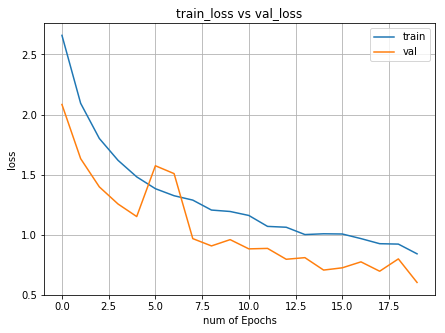

In [25]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

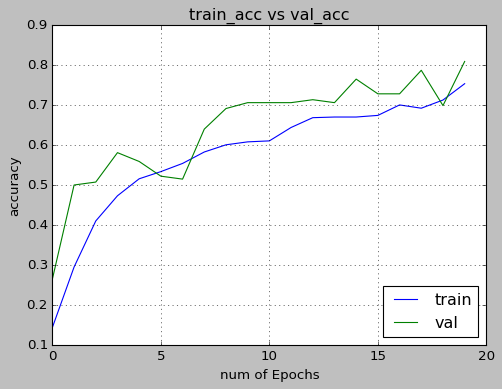

In [26]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [27]:
score = model.evaluate(X_test, y_test,)


136/136 [==============================] - 3s 21ms/step


In [28]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.6050804292454439
Test accuracy: 0.8088235294117647


# Visualizing the intermediate layer


In [29]:
# def get_featuremaps(model, layer_idx, X_batch):
# 	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
# 	activations = get_activations([X_batch,0])
# 	return activations


In [30]:
# layer_num=2
# filter_num=0

# activations = get_featuremaps(model, int(layer_num),test_image)

In [31]:
# print (np.shape(activations))
# feature_maps = activations[0][0]      
# print (np.shape(feature_maps))

# if K.image_dim_ordering()=='th':
# 	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
# print (feature_maps.shape)

In [32]:
# fig=plt.figure(figsize=(16,16))
# plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
# plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')


In [33]:
# num_of_featuremaps=feature_maps.shape[2]
# fig=plt.figure(figsize=(16,16))	
# plt.title("featuremaps-layer-{}".format(layer_num))
# subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
# for i in range(int(num_of_featuremaps)):
# 	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
# 	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
# 	ax.imshow(feature_maps[:,:,i],cmap='gray')
# 	plt.xticks([])
# 	plt.yticks([])
# 	plt.tight_layout()
# plt.show()
# fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

# Printing the confusion matrix


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools


In [35]:
Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[[2.5069227e-02 9.5464871e-04 6.0524568e-03 ... 1.3974120e-03
  1.3699125e-04 1.0184030e-05]
 [3.1765863e-05 1.0199777e-03 3.3602372e-04 ... 2.4621042e-06
  8.4732008e-01 1.1030025e-02]
 [1.3803500e-01 1.1588941e-05 3.2034470e-06 ... 7.9233060e-03
  8.8248216e-06 6.3349456e-05]
 ...
 [1.1836689e-04 9.1994977e-01 2.7930059e-02 ... 4.7175527e-06
  3.9943878e-02 1.1082275e-04]
 [6.9329360e-08 1.4522152e-04 1.9067020e-05 ... 2.1552646e-09
  9.5330119e-01 1.9397163e-04]
 [8.9061245e-08 3.7846737e-06 4.0152167e-06 ... 1.2007925e-08
  4.1555095e-06 1.4494040e-02]]
[13 15 11 15  1 10  1  6 10  4 15  3  4 10  2 16 14 15 12 13 15  0 15  4
 11  3  8  6  0  6  5 10  1  0 16 15 14 10  9 14 10  8  0  4 13 15  6 13
  8  9  0 14 14 15 10 12  2  1  1  5  8  2 11 12  3 11  9 13  4  0 11  0
  4  1 14 14  9  4  3 10  6  4  4  5 16  4  9 11 12 11  0 10 11 14 13  4
 10  5 12 11 10  4  6 11  2 13 11 10 16 16 11  0  6  9 12 12 14  1 16  2
  3 15  2 11  1 15 10 12  7  9  6  8  7  1 15  3]


In [36]:
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=names))


             precision    recall  f1-score   support

   daffodil       0.78      0.54      0.64        13
   snowdrop       0.67      0.86      0.75         7
 lilyvalley       0.67      0.67      0.67         6
   bluebell       1.00      1.00      1.00         6
     crocus       0.83      0.91      0.87        11
       iris       1.00      1.00      1.00         4
  tigerlily       1.00      1.00      1.00         8
      tulip       0.50      0.11      0.18         9
 fritillary       1.00      0.83      0.91         6
  sunflower       1.00      0.88      0.93         8
      daisy       1.00      0.87      0.93        15
  coltsfoot       0.38      0.83      0.53         6
  dandelion       0.75      0.75      0.75         8
    cowslip       1.00      0.88      0.93         8
  buttercup       0.44      1.00      0.62         4
 windflower       0.92      1.00      0.96        11
      pansy       1.00      1.00      1.00         6

avg / total       0.84      0.81      0.80  

In [37]:
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


[[ 7  0  0  0  0  0  0  0  0  0  0  3  0  0  3  0  0]
 [ 0  6  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  1  0  0  0  4  0  0  1  0  0]
 [ 0  0  1  0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  1  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  1  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6]]


# Plotting the confusion matrix


In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix


Confusion matrix, without normalization
[[ 7  0  0  0  0  0  0  0  0  0  0  3  0  0  3  0  0]
 [ 0  6  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  1  0  0  0  4  0  0  1  0  0]
 [ 0  0  1  0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  1  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  1  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6]]


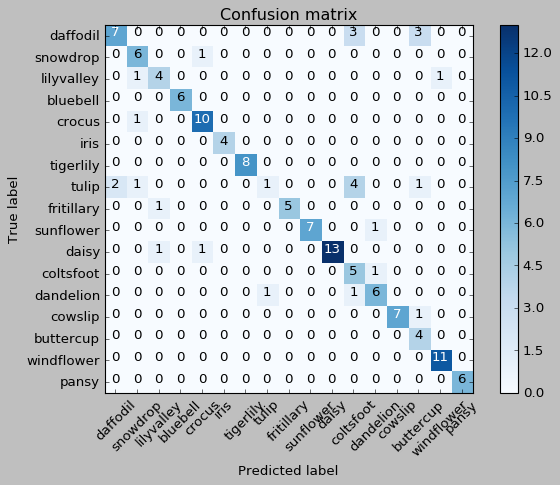

In [40]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix')

In [41]:
plt.show()


# saving the model

In [42]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_flower17_trained_model.h5'

In [43]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/archie/work/flowers/17flower/saved_models/keras_flower17_trained_model.h5 
